# Notebook 14: Introduction to Confidence Intervals Solutions
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

### Exercise 1 - Sampling Confidence Intervals 
*** 

In this exercise we'll get some experience implementing confidence intervals for samples of a population.  Suppose that we wish to sample household incomes from a population in units of hundreds-of-thousands of dollars.  In general it is not necessary that we know the distribution that the quantity of interest follows, but in this case we'll assume that household $\color{red}{\text{income follows a Weibull distribution}}$.

Weibull documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

We can draw samples from this population and plot the histogram as follows: 

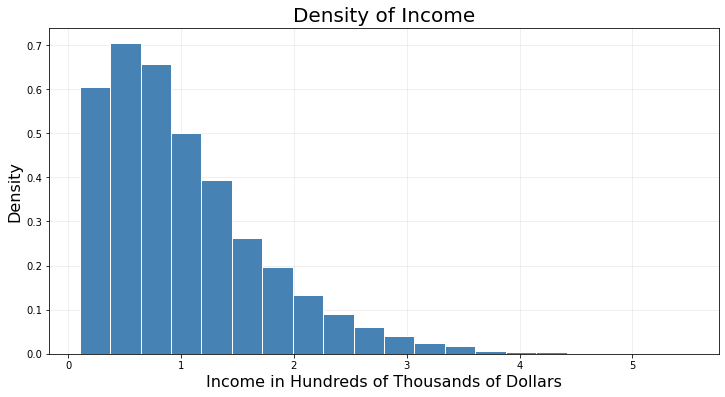

In [4]:
# Initialize the graph
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

# 'x' is an array holding 10000 randomly generated draws from a Weibull distribution.
x = stats.weibull_min.rvs(loc=0.1, c=1.3, size=10000)

# Then, make a Pandas histogram out of 'x'.
# The histogram reveals the shape of the distribution we are working with.
pd.Series(x).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=True)

# Make the graph readable.
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel("Income in Hundreds of Thousands of Dollars", fontsize=16)
ax.set_ylabel("Density", fontsize=16)
ax.set_title("Density of Income", fontsize=20);

**Part A**: Complete the following $\color{red}{\text{function that draws 20 independent samples of size}}$ $\color{red}{n}$ from the population and plots confidence intervals for each sample against the mean.

Because we know the distribution from sampling from, we can use the exact mean and variance in the determination of the confidence intervals.   

mean is:  1.0235767215559781
variance is:  0.5132807238719238


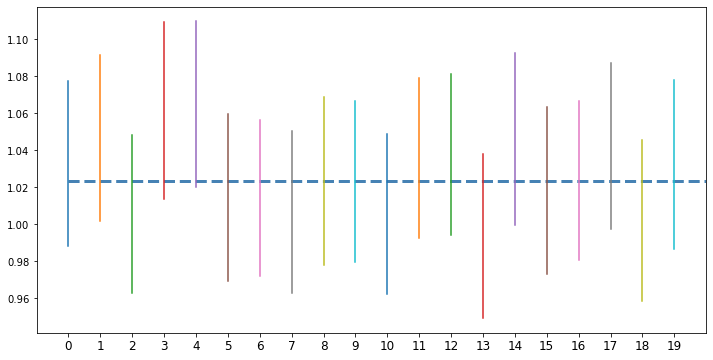

In [9]:
# This function returns a graph of 20 CI's each from a sample of size 'n'.
# This function has inputs: sample size 'n', and alpha level for CI.
def income_CI(n=100, alpha=.05):
    #n id sample size
    #alpha is 1-alpha percent confidence interval so 1-0.05=0.95 so 95% confidence interval
    
    # Initialize the plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    # Get true mean and variance of the distribution and store them in 'mean' and 'var'. 
    # 'moments' is a reserved word. It can return a number of things.
    #   'm' is mean. 'v' is variance. 's' is skew. 'k' is kurtosis.
    # Notice that we are only asking for 2 things 'mv'; mean and variance.
    # We could also ask for skew and/or kurtosis, but we would then need
    #  to name variables to hold these values.
    mean, var = stats.weibull_min.stats(loc=0.1, c=1.3, moments='mv')
    print("mean is: ", mean)
    print("variance is: ", var)
    
    # .plot graphs a line from (0, mean) to (20, mean), i.e. A horizontal line at the
    #    known height ('mean') of our Weibull distribution.
    # 'ls' is line style, and 'lw' is line width
    ax.plot([0,20], [mean, mean], color="steelblue", ls='--', lw=3)
    
    # Now, draw 20 independent samples of size n 
    for sId in range(20):
        
        # Draw 'n' amount of samples from Weibull distribution and store them in array 'x'.
        x = stats.weibull_min.rvs(loc=0.1, c=1.3, size=n)
        
        # xbar is the mean of those 100 elements in the sample
        xbar = np.mean(x)
        
        # This is the z-score for the 95th percentile (if alpha = .05)
        z_alpha = stats.norm.ppf(1-alpha/2)
        
        # SE stores the standard error, i.e. standard deviation of the means
        SE = np.std(x)/np.sqrt(n)
        
        # Now we plot a line from (sId, CImin) to (sId, CImax), i.e. vertical line
        # Recall this loop happens 20 times, therefore 20 bars are created.
        CImin = xbar-z_alpha*SE #lower part of confidence interval
        CImax = xbar+z_alpha*SE #upper part of confidence interval
        ax.plot([sId, sId], [CImin, CImax])

    # Clean up the graph.    
    ax.set_xlim([-1,20])
    plt.xticks(range(20), fontsize=12)

# Now, call the function with sample sizes of 1000     
income_CI(n=1000)



**Part B**: Run your simulation above multiple times.  About how many of the 20 CIs would you expect to not cover the mean?  Do your experiments above bear this out?

At the $\alpha = 0.05$ significance level we expect the $100(1-\alpha)\%$ confidence interval to cover the true mean about 95% of the time.  In most of our experiments we find that $1$ out of $20$ of the CIs fail to cover the true mean, which agrees with our theoretical analysis.

$0.95\cdot20 = 19$